In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Exercise part 1

Create a figure with two subplots.

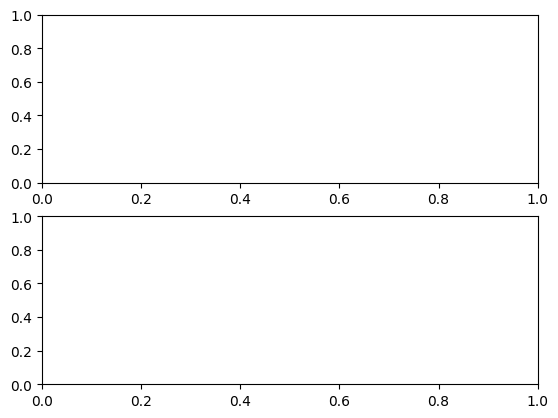

In [3]:
fig,axes = plt.subplots(2,1)

Plot the following data on the first subplot as a scatter plot:

In [4]:
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

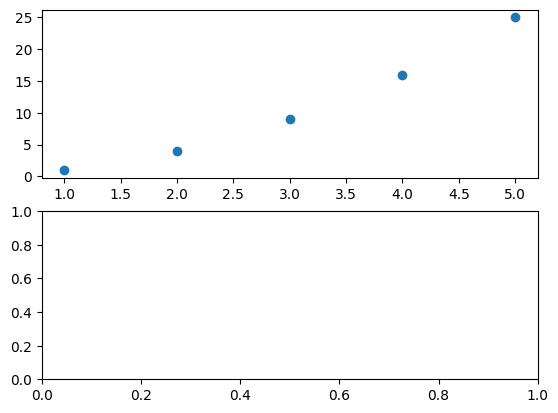

In [7]:
fig,axes = plt.subplots(2,1)
axes[0].scatter(x,y)

Plot the following data on the second subplot as a bar plot:
NOTE: You will need to copy-paste some of the previous code.

In [26]:
x_2 = [1, 2, 3, 4, 5]
y_2 = [1, 8, 27, 64, 125]

<BarContainer object of 5 artists>

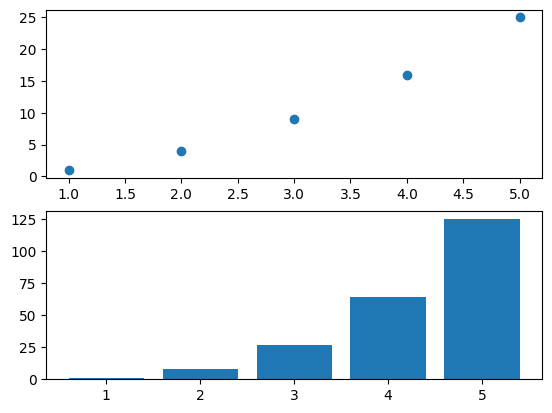

In [27]:
fig,axes = plt.subplots(2,1)
axes[0].scatter(x,y)
axes[1].bar(x_2,y_2)

Set the y-axis limits to 0 and 130.
NOTE: You will need to copy-paste some of the previous code.

(0.0, 130.0)

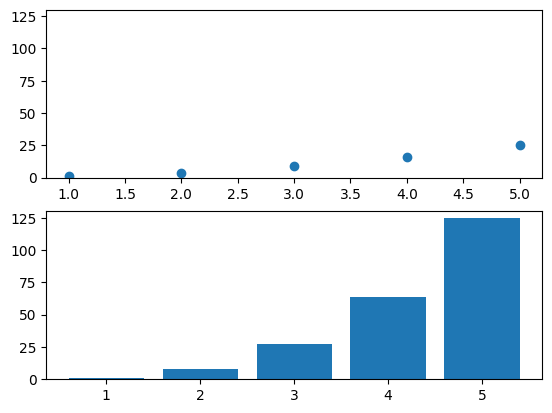

In [28]:
fig,axes = plt.subplots(2,1)
axes[0].scatter(x,y)
axes[1].bar(x_2,y_2)
axes[0].set_ylim(0,130)
axes[1].set_ylim(0,130)

Set the first x-axis label to “x-axis”.
NOTE: You will need to copy-paste some of the previous code. Also, use `plt.tight_layout()` at the end of the code cell to adjust the overall layout of the figure.

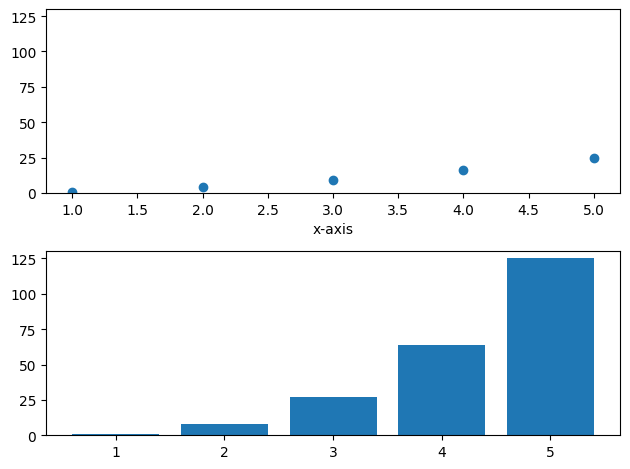

In [29]:
fig,axes = plt.subplots(2,1)
axes[0].scatter(x,y)
axes[1].bar(x_2,y_2)
axes[0].set_ylim(0,130)
axes[1].set_ylim(0,130)
axes[0].set_xlabel("x-axis")

plt.tight_layout()

Set the title of the first subplot to "First subplot".
NOTE: You will need to copy-paste some of the previous code. Also, use `plt.tight_layout()` at the end of the code cell to adjust the overall layout of the figure.

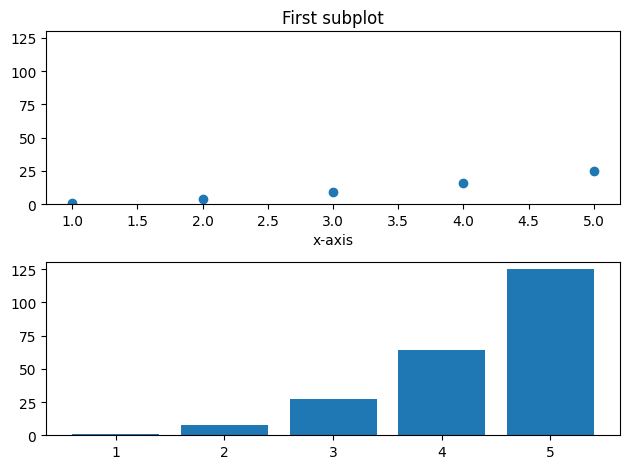

In [30]:
fig,axes = plt.subplots(2,1)
axes[0].scatter(x,y)
axes[1].bar(x_2,y_2)
axes[0].set_ylim(0,130)
axes[1].set_ylim(0,130)
axes[0].set_xlabel("x-axis")
axes[0].set_title("First subplot")

plt.tight_layout()

Change the color of the bars to red and the color of the scatter points to green (`#00FF00`).
NOTE: You will need to copy-paste some of the previous code. Also, use `plt.tight_layout()` at the end of the code cell to adjust the overall layout of the figure.

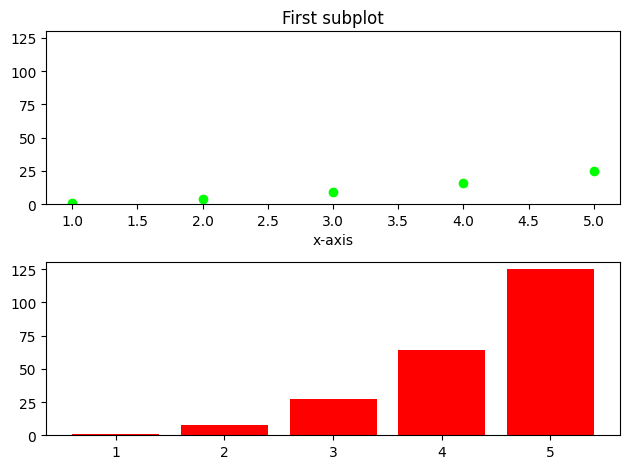

In [31]:
fig,axes = plt.subplots(2,1)
axes[0].scatter(x,y,color= "#00FF00")
axes[1].bar(x_2,y_2, color="red")
axes[0].set_ylim(0,130)
axes[1].set_ylim(0,130)
axes[0].set_xlabel("x-axis")
axes[0].set_title("First subplot")


plt.tight_layout()

Take the same data, generate a new figure with 1 plot and overlay the scatter and bar plot on the same axes.

Text(0.5, 1.0, 'First subplot')

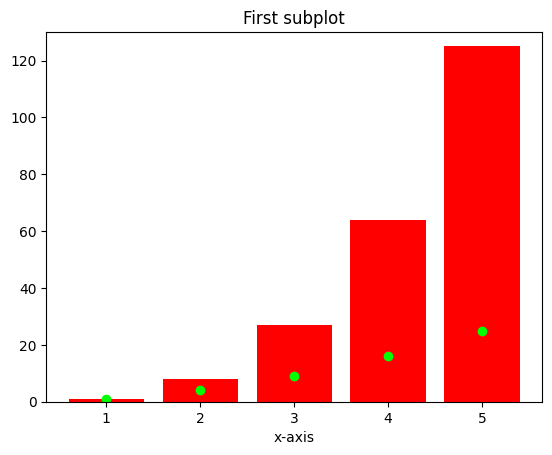

In [34]:
plt.bar(x_2,y_2, color="red")
plt.scatter(x,y,color= "#00FF00")
plt.ylim(0,130)
plt.xlabel("x-axis")
plt.title("First subplot")

# Exercise part 2

Load the data from the file deseq2_results.npy into an array called deseq2_res.

In [25]:
deseq2_res = np.load("/project/shared/python/2_python_data_science/data/deseq2_results.npy",
                     allow_pickle=True)
deseq2_res

array([[108.15850921537172, 0.0967149889735765, 0.6707838991959768],
       [65.14581354916434, -0.3625646598964849, 0.4277856185605441],
       [45.87660135030436, -0.2772388647227754, 0.3231357906568136],
       ...,
       [253.3760695286481, -0.0669547563114094, 0.6837369965268935],
       [75.10774055663956, 0.4271305631568897, 0.0471371257904044],
       [577.1637033166951, -5.142411887906503, 4.2583570415353935e-194]],
      dtype=object)

Run `deseq2_res = deseq2_res.astype(float)` to convert the array data type to floating point.

In [35]:
deseq2_res = deseq2_res.astype(float)
deseq2_res

array([[ 1.08158509e+002,  9.67149890e-002,  6.70783899e-001],
       [ 6.51458135e+001, -3.62564660e-001,  4.27785619e-001],
       [ 4.58766014e+001, -2.77238865e-001,  3.23135791e-001],
       ...,
       [ 2.53376070e+002, -6.69547563e-002,  6.83736997e-001],
       [ 7.51077406e+001,  4.27130563e-001,  4.71371258e-002],
       [ 5.77163703e+002, -5.14241189e+000,  4.25835704e-194]])

Run `deseq2_res = np.nan_to_num(deseq2_res)` to convert `NaN` values to numeric.

In [36]:
deseq2_res = np.nan_to_num(deseq2_res)

Generate an MA plot of the data:
- X-axis: log2BaseMean
- Y-axis: log2FoldChange
- Color: `padj < 0.05` = red and `pad >= 0.5` = grey
- Add a horizontal line at `y = 0` dashed and grey
- Add a title, x-axis label, y-axis label and legend

NOTE: Add `plt.tight_layout()` at the end of the code cell to adjust the overall figure layout.

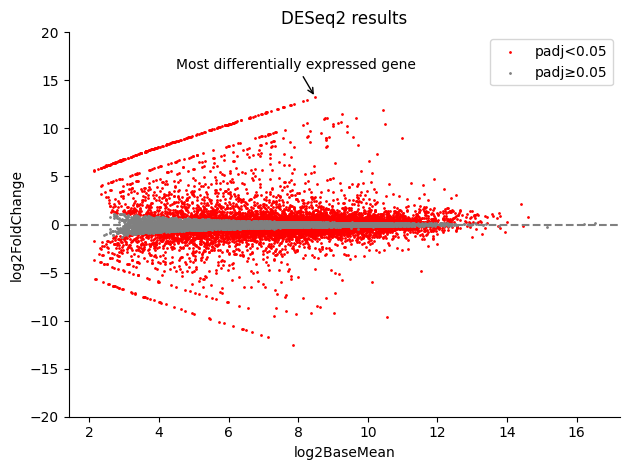

In [106]:
fig,ax=plt.subplots()

ax.scatter(np.log2(deseq2_res[(deseq2_res[:,2]<0.05),0]),deseq2_res[(deseq2_res[:,2]<0.05),1],color="red",label="padj<0.05",s=1)
ax.scatter(np.log2(deseq2_res[(deseq2_res[:,2]>=0.05),0]),deseq2_res[(deseq2_res[:,2]>=0.05),1],color="grey",label="padj≥0.05",s=1)

#ax.hlines(0,0,20, color="grey",linestyle="dashed")
ax.axhline(0, color="grey",linestyle="dashed")

ax.set_xlabel("log2BaseMean")
ax.set_ylabel("log2FoldChange")
ax.set_title("DESeq2 results")
ax.legend()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim(-20,20)
most_d=np.argmax(deseq2_res[:,1])
ax.annotate("Most differentially expressed gene", xy=(np.log2(deseq2_res[most_d,0]),deseq2_res[most_d,1]),xytext=(np.log2(deseq2_res[most_d,0])-4,deseq2_res[most_d,1]+3),color="black",arrowprops={"arrowstyle":"->"})


plt.tight_layout()